In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimers-disease-risk-prediction-eu-business/submission_template.csv
/kaggle/input/alzheimers-disease-risk-prediction-eu-business/data_description.txt
/kaggle/input/alzheimers-disease-risk-prediction-eu-business/train.csv
/kaggle/input/alzheimers-disease-risk-prediction-eu-business/test.csv


# 1. Data Exploration

In [3]:
import pandas as pd
import numpy as np

## 1-1. Check Existence of Missing value

In [4]:
df_train = pd.read_csv("/kaggle/input/alzheimers-disease-risk-prediction-eu-business/train.csv")
print(f"The number of columns/features: {df_train.shape[1]}")
print(f"The number of null:\n{df_train.isnull().sum()}")

The number of columns/features: 35
The number of null:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChan

## 1-2. Check Categories/Kinds of String value

In [5]:
data_train = df_train.iloc[:, 1:35]
data_train.head(5)
print(data_train["DoctorInCharge"].unique())

['XXXConfid']


In [6]:
# Omit "DoctorInCharge" from list of features for data analysis
data_train = df_train.iloc[:, 1:34]
data_train.head(5)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,87,1,2,1,27.764232,1,16.543170,0.281379,5.923418,7.836104,...,3.085543,0,0,6.643693,0,0,0,0,0,0
1,70,0,0,3,37.098744,0,1.360202,9.242990,1.819284,5.218052,...,5.616830,0,1,3.884562,0,0,0,0,1,1
2,82,1,3,2,15.908275,0,16.329031,1.915913,6.607292,6.146166,...,3.662461,0,0,4.013722,0,0,1,1,0,1
3,76,1,0,2,30.302432,1,11.814030,6.281170,6.204349,6.825155,...,4.648135,0,0,9.355700,1,0,1,0,1,0
4,61,0,0,2,24.565357,1,2.273373,9.976581,2.057188,4.715534,...,9.601238,1,0,8.818932,0,1,0,0,0,1


## 1-3. Look into columns & Categorize data type of columns

1. Nominal Categorical(17)
   : Gender, EducationLevel, Ethnicity, Smoking, FamilyHistoryAlzheimers, CardiovascularDisease,
     Diabetes, Depression, HeadInjury, Hypertension, MemoryComplaints, BehavioralProblems,
     Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness
   -> **Matthews Correlation Coefficient**
    <br>
    <br>
2. Continuous Numerical(14)
   : Age, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality,
     MMSE(Mini-Mental State Exam score, 0–30),
     FunctionalAssessment(Functional score, 0–10),
     ADL (Activities of Daily Living score, 0–10),
     BMI, SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides
   -> **Point-biseral Correlation**
   <br>
   <br>
4. Diagnosis - Nominal Categorical

### 1-3-1. Matthews Correlations(MCC) for the whole columns/features

#### Features highly related to Diagnosis
1. FunctionalAssessment(-0.38)
2. ADL(-0.34)
3. MemoryComplaints(0.3)
4. MMSE(-0.22)
5. BehavioralProblems(0.21)

Unexpectedly, "Age" is not related to Alzheimer Diagonis. So we have to check distribution of values in Age

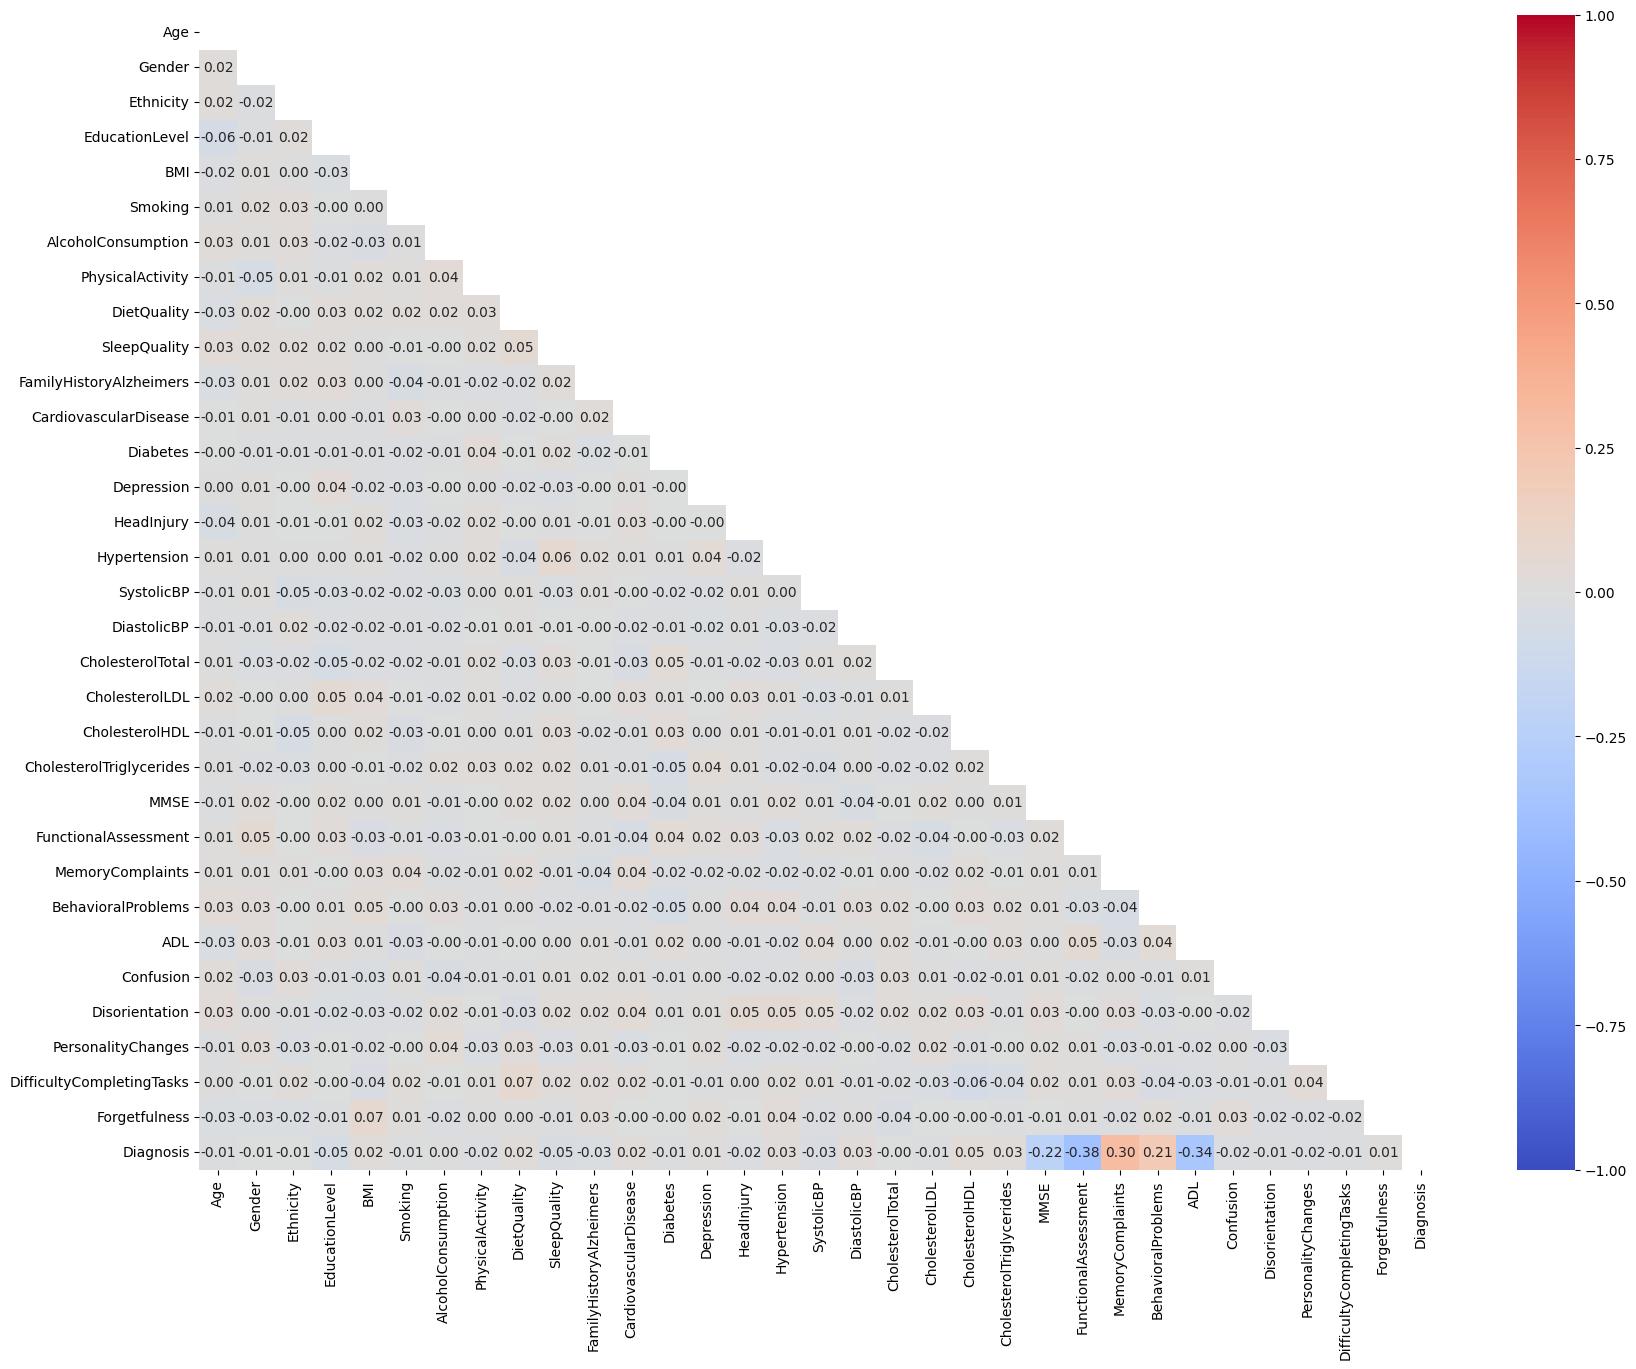

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

data_train_corr = data_train.corr()

plt.rcParams["figure.figsize"] = (20, 15)

mask = np.triu(np.ones_like(data_train_corr))
ax = sns.heatmap(data_train_corr, annot=True, cmap="coolwarm", vmax=1, vmin=-1, mask=mask, fmt=".2f")

### 1-3-2. Matthews Correlations(MCC) for Nominal data

#### Features highly related to Diagnosis
1. MemoryComplaints(0.30)
2. BehavioralProblems(-0.21)

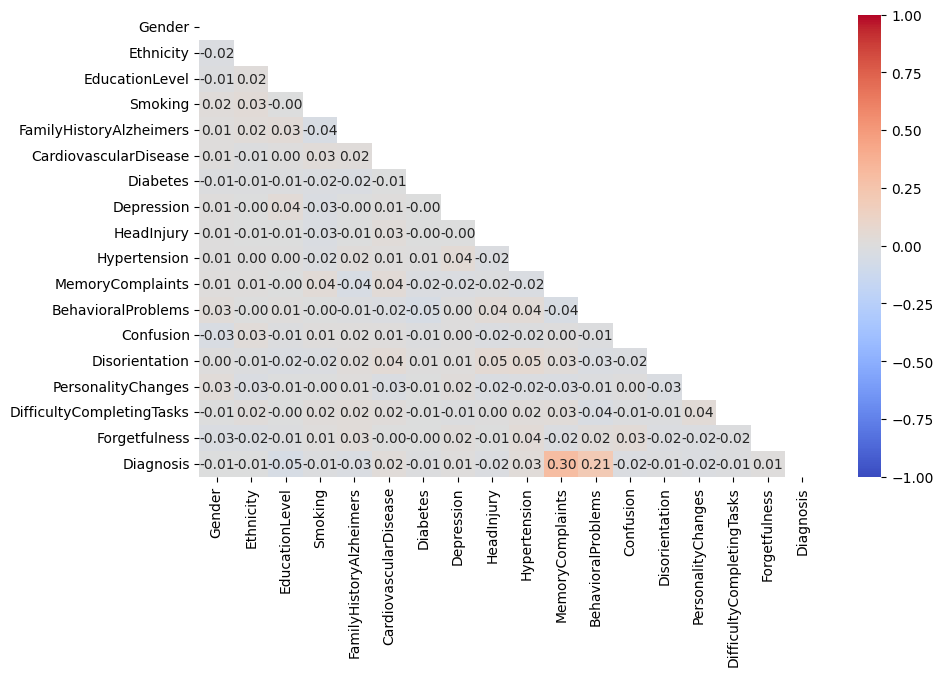

In [11]:
drop_Con = ["Age", "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality", "MMSE", "FunctionalAssessment", "ADL", "BMI", "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides"]
data_train_Nom =  data_train.drop(drop_Con, axis=1)
data_train_Nom
data_train_Nom_corr = data_train_Nom.corr(method="pearson")

plt.rcParams["figure.figsize"] = (10, 6)
mask = np.triu(np.ones_like(data_train_Nom_corr))
ax = sns.heatmap(data_train_Nom_corr, annot=True, cmap="coolwarm", vmax=1, vmin=-1, mask=mask, fmt=".2f")

### 1-3-3. Point-Biserial Correlation for Continuous data

Point-Biserial Correlation of most features is less than 0.1 of the absolute value, which means "statistically meaningless".<br>
This is because The closer Correlation value is to 1 of the absolute value, the more "statistically-related" two features are.  

However, the Correlation values of MMSE, functionalAssessment and ADL are -0.2246, -0.3779, -0.3398 respectively.<br>It indicates they are related to "Diagnosis". Even their p-value is 0.

In [12]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr

# Point-Biserial Correlation 계산
for i in data_train_Con.columns:
    corr, p_value = pointbiserialr(data_train_Con["Diagnosis"], data_train_Con[i])
    print(f"Point-Biserial Correlation: {corr:.4f}, p-value: {p_value:.4f} - {i}")

Point-Biserial Correlation: -0.0130, p-value: 0.5894 - Age
Point-Biserial Correlation: 0.0205, p-value: 0.3955 - BMI
Point-Biserial Correlation: 0.0015, p-value: 0.9497 - AlcoholConsumption
Point-Biserial Correlation: -0.0195, p-value: 0.4198 - PhysicalActivity
Point-Biserial Correlation: 0.0222, p-value: 0.3576 - DietQuality
Point-Biserial Correlation: -0.0454, p-value: 0.0597 - SleepQuality
Point-Biserial Correlation: -0.0316, p-value: 0.1898 - SystolicBP
Point-Biserial Correlation: 0.0298, p-value: 0.2176 - DiastolicBP
Point-Biserial Correlation: -0.0013, p-value: 0.9573 - CholesterolTotal
Point-Biserial Correlation: -0.0113, p-value: 0.6411 - CholesterolLDL
Point-Biserial Correlation: 0.0459, p-value: 0.0572 - CholesterolHDL
Point-Biserial Correlation: 0.0292, p-value: 0.2257 - CholesterolTriglycerides
Point-Biserial Correlation: -0.2246, p-value: 0.0000 - MMSE
Point-Biserial Correlation: -0.3779, p-value: 0.0000 - FunctionalAssessment
Point-Biserial Correlation: -0.3398, p-value: 

In [13]:
drop_Nom = ["Gender", "EducationLevel", "Ethnicity", "Smoking", "FamilyHistoryAlzheimers", "CardiovascularDisease", "Diabetes", "Depression", "HeadInjury", "Hypertension", "MemoryComplaints", "BehavioralProblems", "Confusion", "Disorientation", "PersonalityChanges", "DifficultyCompletingTasks", "Forgetfulness"]
data_train_Con =  data_train.drop(drop_Nom, axis=1)
data_train_Con

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,Diagnosis
0,87,27.764232,16.543170,0.281379,5.923418,7.836104,165,104,152.867282,81.773928,36.315501,156.315737,25.399206,3.085543,6.643693,0
1,70,37.098744,1.360202,9.242990,1.819284,5.218052,144,93,172.951803,181.531732,59.846219,284.212782,8.292136,5.616830,3.884562,1
2,82,15.908275,16.329031,1.915913,6.607292,6.146166,90,112,234.274917,76.270979,96.793492,174.718861,21.042238,3.662461,4.013722,1
3,76,30.302432,11.814030,6.281170,6.204349,6.825155,95,119,233.623114,101.048013,23.251477,230.796600,28.609438,4.648135,9.355700,0
4,61,24.565357,2.273373,9.976581,2.057188,4.715534,169,69,286.509759,58.658641,78.508468,225.360895,2.629135,9.601238,8.818932,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,82,22.874070,16.006145,7.411056,2.341965,6.688947,160,94,228.586845,140.119152,58.861173,214.975942,7.325867,5.432951,0.214825,0
1715,82,25.522233,15.432489,4.149322,9.605963,5.235691,128,112,239.084152,137.391883,23.909989,164.038131,11.671289,0.298203,5.590417,1
1716,85,29.216597,9.424858,8.004951,4.276642,7.641721,124,118,295.214276,175.599879,61.726494,62.163080,28.463207,1.957638,4.030134,0
1717,89,25.741021,0.036260,6.292084,9.072249,8.497493,161,76,165.713426,143.626546,85.622160,340.890951,6.230189,5.535547,3.464861,0


In [14]:
df_train["Age"].unique()

array([87, 70, 82, 76, 61, 84, 80, 78, 89, 81, 88, 69, 65, 75, 86, 72, 83,
       74, 77, 73, 60, 62, 68, 67, 85, 79, 71, 64, 90, 63, 66])

### 1-3-4. Histplot for Numerical data
This Hisplot code is based on: https://www.kaggle.com/code/nicholasvettor/1st-place-alzheimer-s-risk-xgboost-optuna</br>
My view for data is quite different from that of the above code.</br>
I divided dataset into two categories, **Nominal** and **Continuous**, while the author of the above code only considered **float64** (called as Numerical)</br>

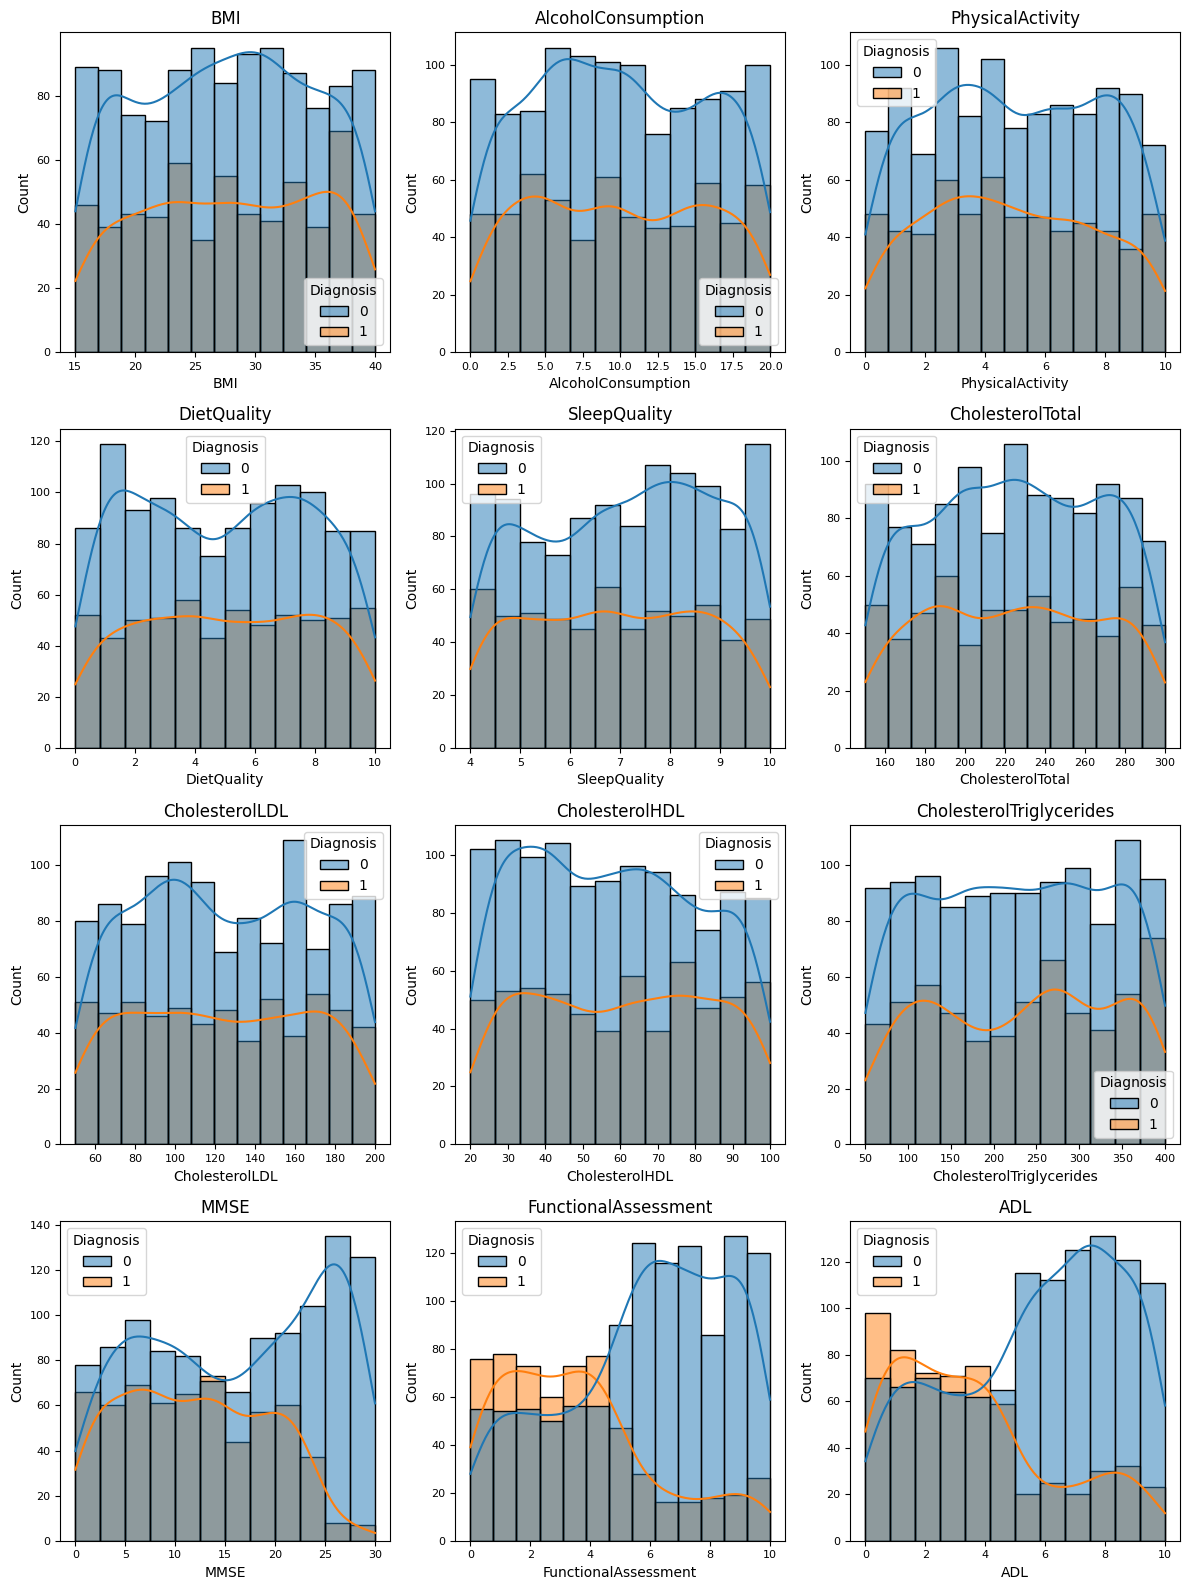

In [16]:
# get rid of seaborn warnings (amazing practices)
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

# split columns
X = data_train.drop("Diagnosis", axis=1)
y = data_train["Diagnosis"]

# get numerical columns
num_cols=X.select_dtypes(include='float64').columns.tolist()

# ------ This point indicates that the viewpoint for data is different from mine ------ 
# fancy code to create correct-sized plots
num_plots = len(num_cols)  # Number of numerical columns
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Arrange in a grid (3 columns per row)

# lower figure size for plots to ensure 0 overlap
fig, axes = plt.subplots(rows, 3, figsize=(12, 4 * rows))  # Adjust figure size for compact layou

# flatten axes
axes = axes.flatten()

# create histograms for column
for i, col in enumerate(num_cols):
    sns.histplot(x=data_train[col], kde=True, hue=y, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='both', labelsize=8)

# show graphs
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

This heatmap shows orange colored bar appear noticeably on **FunctionalAssessment** and **ADL** </br>
They were noticeable on the heatmap for the whole dataset, as well (FunctionalAssessment: -0.38, ADL: -0.34).</br>
<span style="color:red"> --> The two factors would have relatively strong influence on Diagnosis than other factors </span>

### Feature Normalization
with Min-Max Scaling (0~1)

However, two scores of non-minMAXscaled(Version 4) and minMAXscaled(Version 5) are the same, "0.74305" <br>
Thus, the things to notice should be kinds of model and features which I have to use, instead of scaling.

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# def minMAX(dataset): 
#     minMAXscaler = MinMaxScaler()
#     minMAXscaler.fit(dataset)
    
#     minMAXscaled_data = minMAXscaler.transform(dataset)
#     minMAXscaled_data = pd.DataFrame(minMAXscaled_data)
#     return minMAXscaled_data

# mM_data_train = minMAX(data_train)
# mM_data_train.head(5)

### Split train and test from "train.csv"

Why do I need to split train and test set in this project? <br>
Although I have to check if my model works well or not, answers of Diagnosis were not given in "test.csv"<br>
Also, "submission" is limited to maximum of 5 times per participant everyday.

In [ ]:
from sklearn.model_selection import train_test_split
train, eval = train_test_split(data_train, test_size=0.2)

In [ ]:
# Set up features as "X_train" and Diagnosis as "y_train" from min-MAX scaled dataset
X_train = train.iloc[:, 0:32]
y_train = train.iloc[:, 32]
print(X_train.shape, y_train.shape)

# Set up features as "X_eval" and Diagnosis as "y_eval" from min-MAX scaled dataset
X_eval = eval.iloc[:, 0:32]
y_eval = eval.iloc[:, 32]
print(X_eval.shape, y_eval.shape)

### Import Models

In [ ]:
# import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [ ]:
model_LR = LinearRegression()
model_DT = DecisionTreeClassifier(criterion = "entropy")
model_XGB = XGBClassifier()

### Evaluate my model with "train" and "eval" variables
X_train, y_train <br>
X_eval, y_eval

#### 1) Linear Regression (Score: 0.74305)


In [ ]:
model_LR.fit(X_train, y_train)
y_eval_pred_LR = model_LR.predict(X_eval)

# Convert Predictions to Binary (Threshold = 0.5)
y_eval_pred_LR = (y_eval_pred_LR >= 0.5).astype(int)  # Convert to 0 or 1

from sklearn.metrics import classification_report
print(classification_report(y_eval_pred_LR, y_eval))

#### 2) Decision Tree (Score: 0.87868)

In [ ]:
model_DT.fit(X_train, y_train)
y_eval_pred_DT = model_DT.predict(X_eval).astype(int)

print(classification_report(y_eval_pred_DT, y_eval))

#### 3) XGBoost-Boosting Ensemble (Score: 0.92666)


In [ ]:
model_XGB.fit(X_train, y_train)
y_eval_pred_XGB = model_XGB.predict(X_eval).astype(int)

print(classification_report(y_eval_pred_XGB, y_eval))

#### 4) Tune the best model(XGBoost here) to improve performance (GridSearchCV Score: 0.93288)

##### (1) with "class_weight" to assign higher weights to minority class, helping XGBoost learn better
However, it produces almost same F1 score as the base XGBoost

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight("balanced", y_train)
model_XGB.fit(X_train, y_train, sample_weight=sample_weights)

y_eval_pred_XGB_sm = model_XGB.predict(X_eval).astype(int)
print(classification_report(y_eval_pred_XGB_sm, y_eval))

##### (2) with "SMOTE" to create synthetic samples of the minority class, balancing the dataset
However, "SMOTE" doesn't overcome the base XGBoost in F1 score

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model_XGB.fit(X_train_resampled, y_train_resampled)
y_eval_pred_XGB_SMOTE = model_XGB.predict(X_eval).astype(int)
print(classification_report(y_eval_pred_XGB_SMOTE, y_eval))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 7],            # Control overfitting
    "learning_rate": [0.01, 0.1, 0.2], # Reduce learning rate for stability
    "n_estimators": [100, 300, 500],   # Increase trees for better learning
    "gamma": [0, 0.1, 0.3],            # Reduce unnecessary splits
    "subsample": [0.7, 1],             # Prevent overfitting
    "colsample_bytree": [0.7, 1]       # Feature selection
}

model_XGB = XGBClassifier(objective="binary:logistic", eval_metric="logloss")
grid_search = GridSearchCV(model_XGB, param_grid, scoring="f1", cv=3, verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

In [ ]:
model_XGB_grid = grid_search.best_estimator_
model_XGB_grid.fit(X_train, y_train)
y_eval_pred_XGB_grid = model_XGB_grid.predict(X_eval).astype(int)
print(classification_report(y_eval_pred_XGB_grid, y_eval))

### Apply the best model to "test.csv"

#### 1) Pre-process "test.csv" to Dataframe

In [ ]:
df_test = pd.read_csv("/kaggle/input/alzheimers-disease-risk-prediction-eu-business/test.csv")
print(f"The number of columns/features: {df_test.shape[1]}")
print(f"The number of null:\n{df_test.isnull().sum()}")

In [ ]:
# Omit "PatientID" and "DoctorInCharge" from columns
data_test = df_test.iloc[:, 1:33]
data_test.head(5)

In [ ]:
mM_data_test = minMAX(data_test)
mM_data_test.head(5)

In [ ]:
X_test = mM_data_test

In [ ]:
y_pred = model_XGB_grid.predict(X_test).astype(int)

In [ ]:
submission = pd.DataFrame({
    "PatientID": df_test["PatientID"],
    "Diagnosis": y_pred
})

submission.to_csv("/kaggle/working/submission.csv", index=False)
print("✅ Submission file saved as submission.csv")

In [ ]:
df_sub = pd.read_csv("/kaggle/working/submission.csv")
df_sub.tail(10)